# `KNN from Scratch `

## Task: `Predict the diamond price.`💎

## `Understanding the dataset`

## `Importing libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## `Importing dataset`

In [2]:
df = pd.read_csv('data/diamonds.csv')

**`Top 5 Rows`**

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**`Last 5 Rows`**

In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


**`Checking types of columns`**

In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

**`Checking number of rows and columns`**

In [6]:
print('Total number of rows -',df.shape[0])
print('Total number of columsn -',df.shape[1])


Total number of rows - 53940
Total number of columsn - 10


## `Data Cleaning or Data Wrangling or Data Pre-processing`

1. Identify and handle missing data
2. Data formatting
3. Data normalization
4. Data bining
5. Turning categorical to numerical data

**`Missing values`**
<br> It could be represented as '?', 'N/A', '0' or just blank cell

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**`Checking duplicates values`**

In [9]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [10]:
df.drop_duplicates(inplace=True,ignore_index=True)

## `Exploratory Data Analysis`

How to choose the right visualization method?<br>
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

**`Spliting of numerical and categorical columns`**

In [11]:
num_col = df.select_dtypes(include= ['float','int']).columns
cat_col = df.select_dtypes(include= ['object']).columns

In [12]:
num_col, cat_col

(Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

## `Finding outliers`

In [13]:
for col in cat_col:
    print(df[col].value_counts())
    print()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64



In [14]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53794 non-null  float64
 1   depth   53794 non-null  float64
 2   table   53794 non-null  float64
 3   price   53794 non-null  int64  
 4   x       53794 non-null  float64
 5   y       53794 non-null  float64
 6   z       53794 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


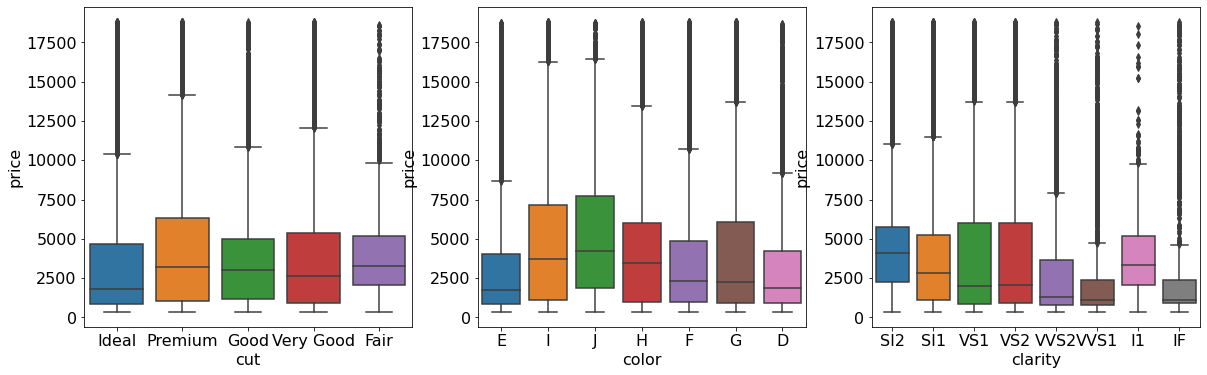

In [15]:
plt.figure(figsize = (20, 20))
plt.rc('font', size=16)

for i, col in enumerate(cat_col):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = df[col], y = df['price'])

### `Removing outliers using IQR`

In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 - q1

In [17]:
df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis = 1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
35,0.23,Good,F,VS1,58.2,59.0,402,4.06,4.08,2.37
42,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...
53736,0.71,Fair,D,VS1,65.4,59.0,2747,5.62,5.58,3.66
53740,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
53744,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53749,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36


In [18]:
#df = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis = 1)]

In [19]:
#df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis = 1)]

### `Univariate Analysis`:<br>
Data consists of only one variable (only x value).<br>
   a. Line Plots / Bar Charts<br>
   b. Histograms<br>
   c. Box Plots<br>
   d. Count Plots<br>
   e. Descriptive Statistics techniques<br>


In [20]:
df[num_col].describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### `Ploting for numerical columns`

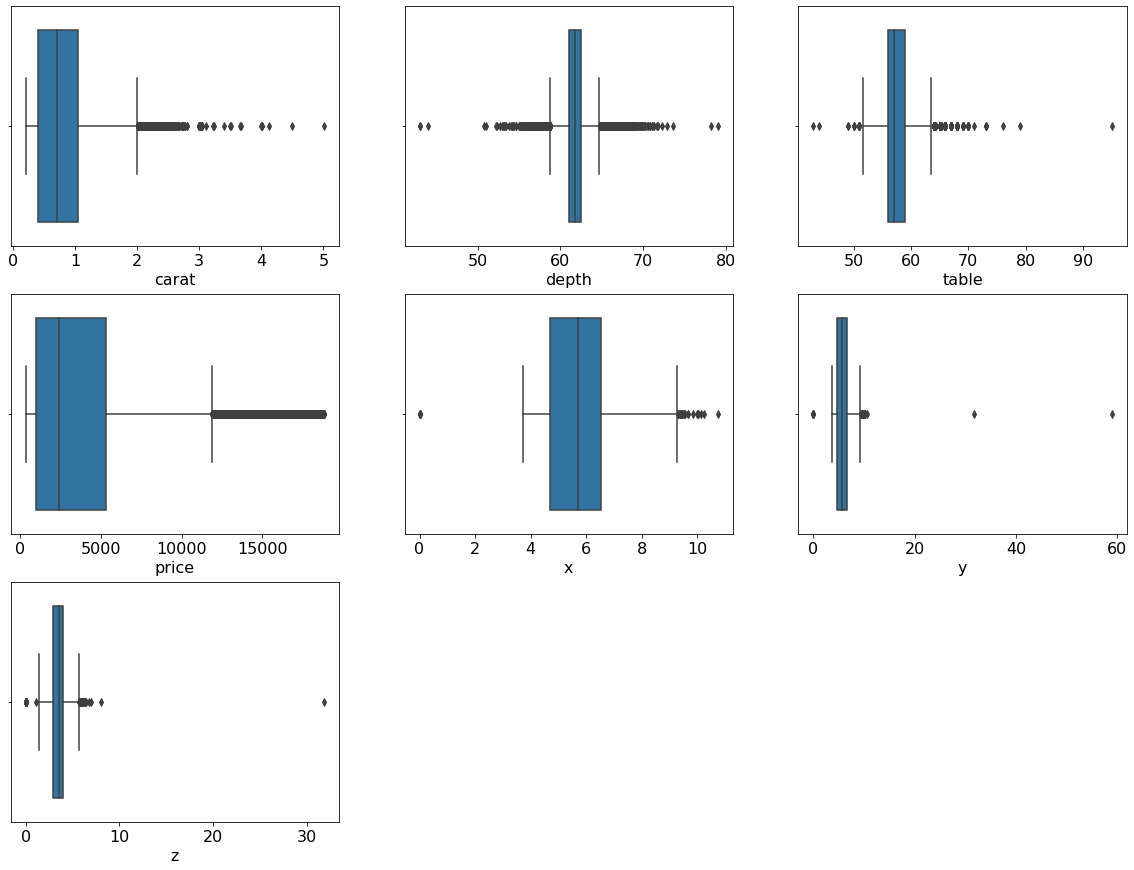

In [21]:
plt.figure(figsize = (20, 15))

for i, col in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])

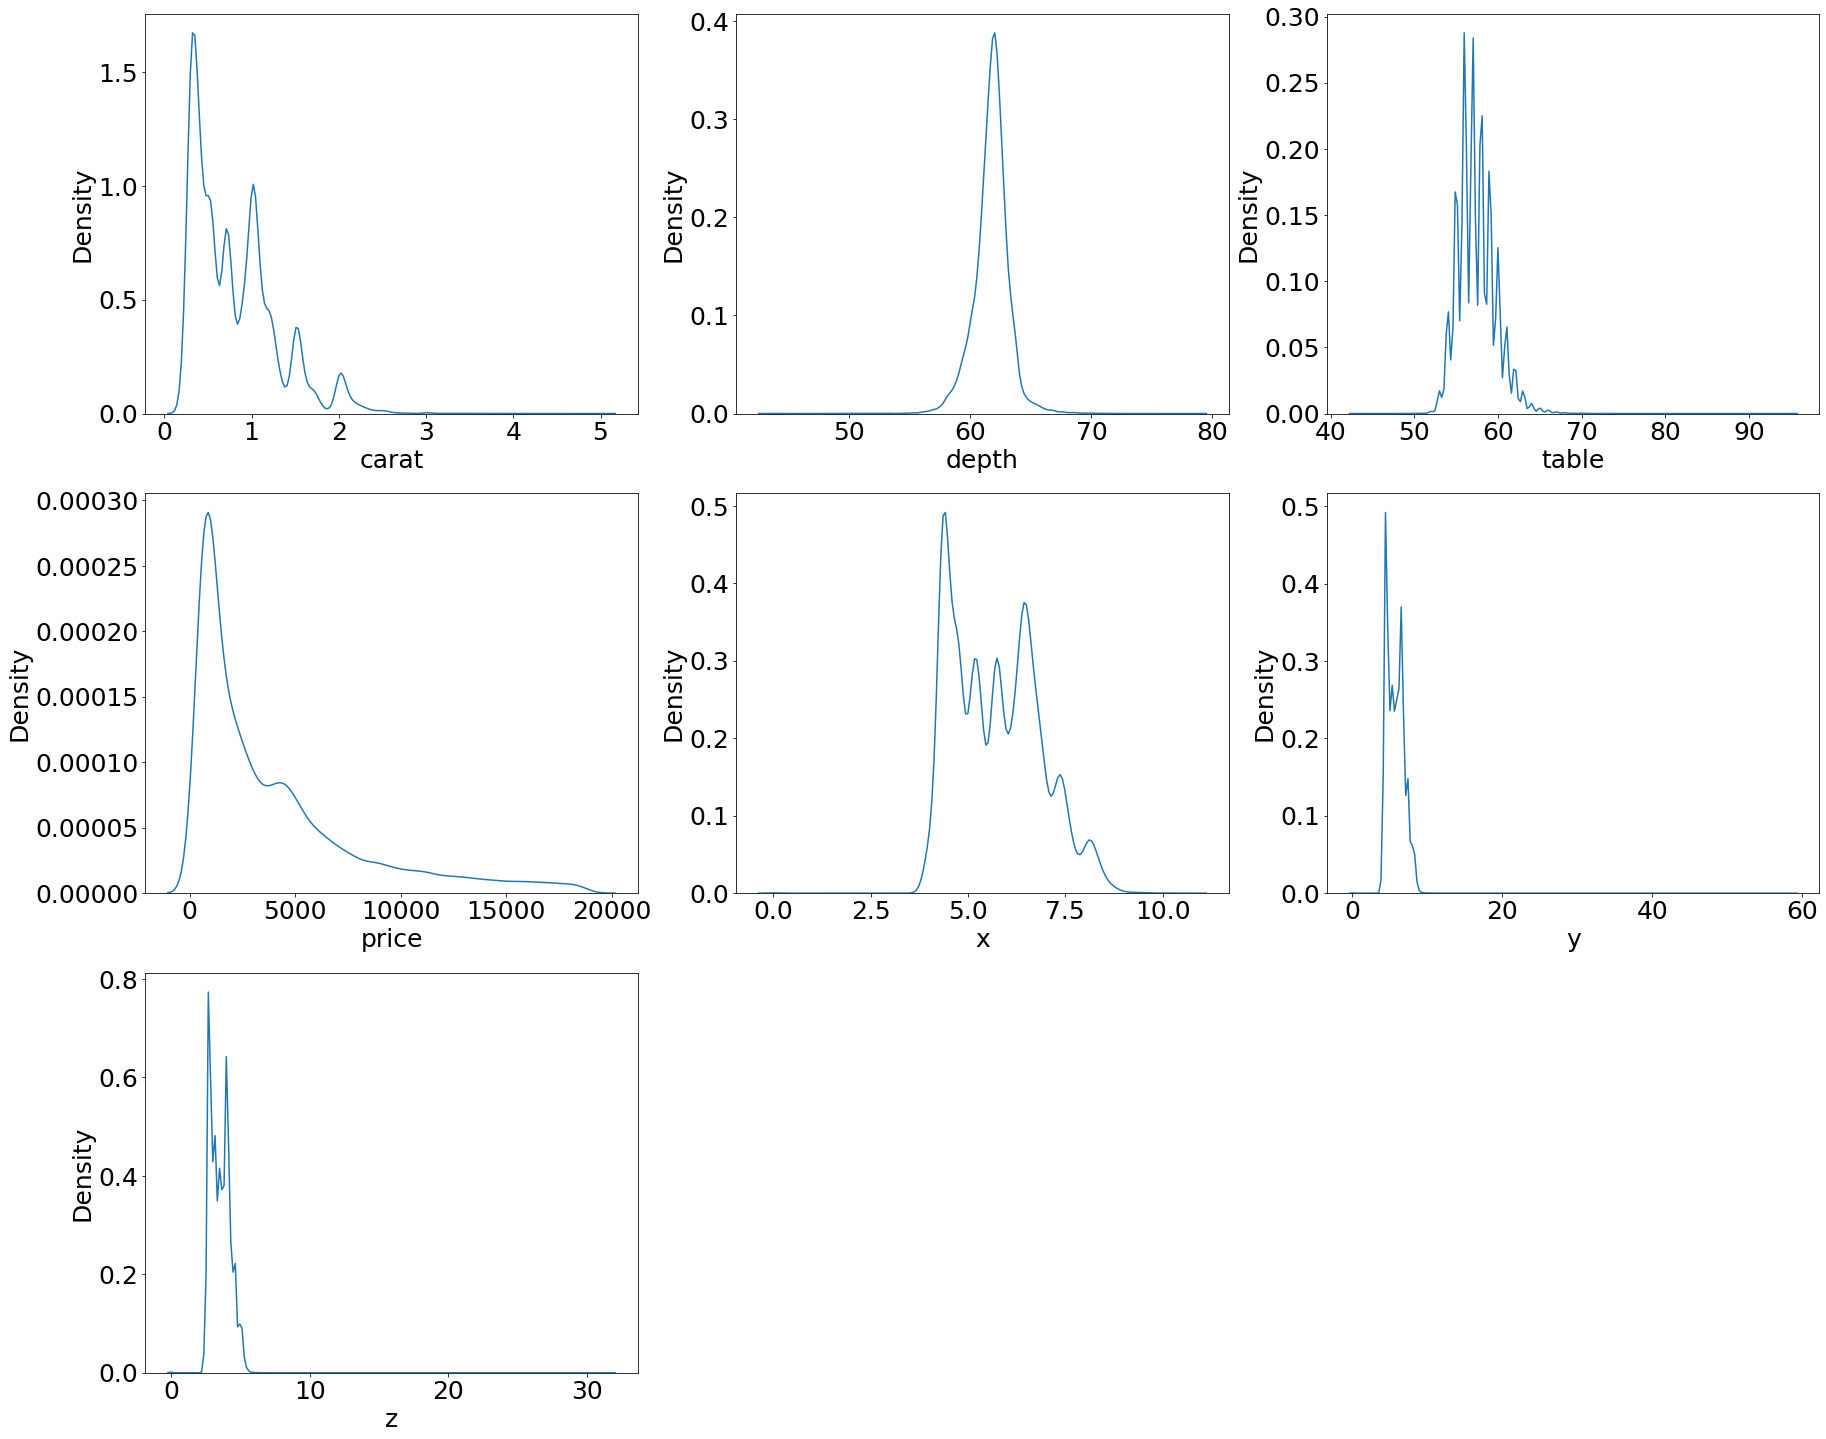

In [22]:
plt.figure(figsize=(30,25))
plt.rc('font', size=25)
for i, col in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.distplot(df[col],hist = False)
    

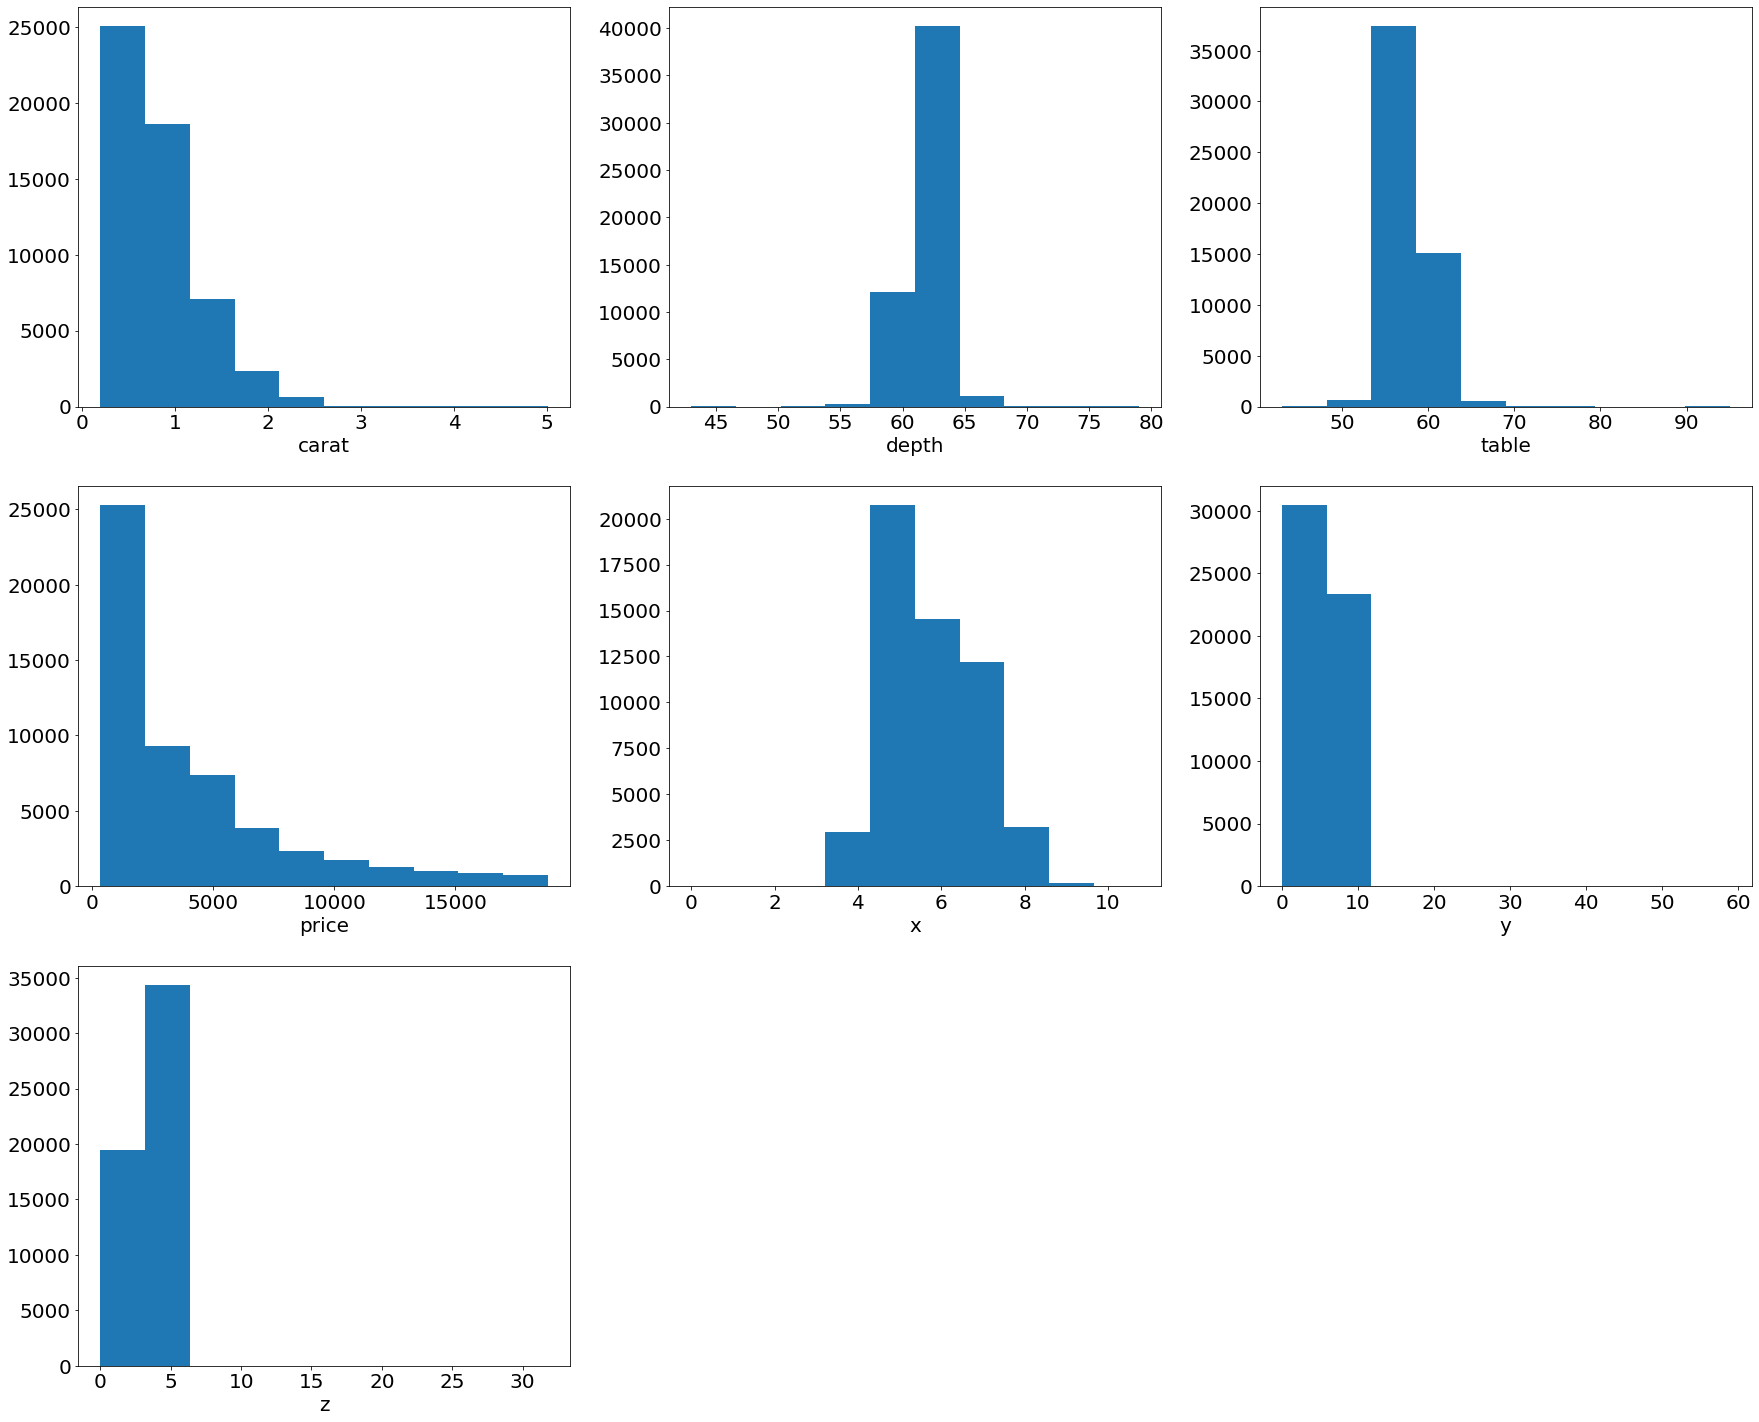

In [23]:
plt.figure(figsize=(30,25))
plt.rc('font', size=20)
for i, col in enumerate(num_col):
    plt.subplot(3,3,i+1)
    plt.hist(df[col])
    plt.xlabel(col)


#### `Ploting for categorical columns`

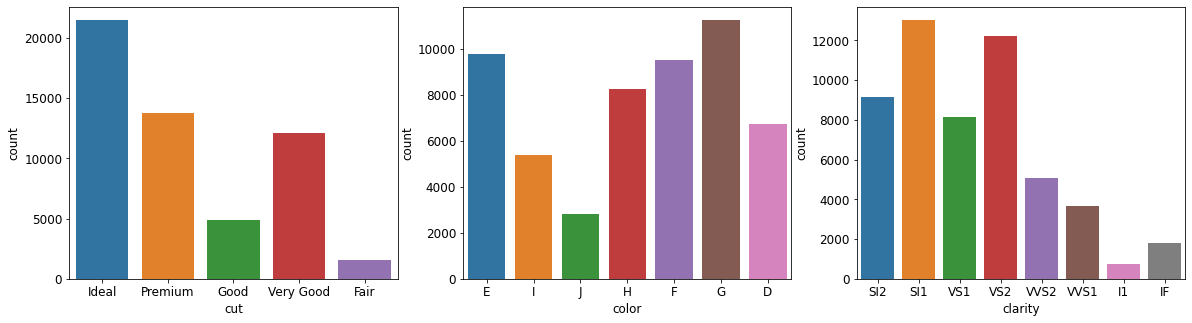

In [24]:
plt.figure(figsize=(20,5))
plt.rc('font', size=12)
for i, col in enumerate(cat_col):
    plt.subplot(1,3,i+1)
    sns.countplot(df[col])
   


### `Bivariate  Analysis`:<br>
When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:
<br><br>
i) Numerical & Numerical<br>
   a. Scatterplot<br>
   b. Line plot<br>
   c. Heatmap for correlation<br><br>
ii) Numerical & Categorical<br>
   a. Bar chart<br>
   b. Categorical box plot<br><br>
iii) Categorical & Categorical<br>
   a. Bar chart<br>
   b. Grouped bar chart<br>


#### `Ploting for numerical columns`

**Correlation**

In [25]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


<AxesSubplot:>

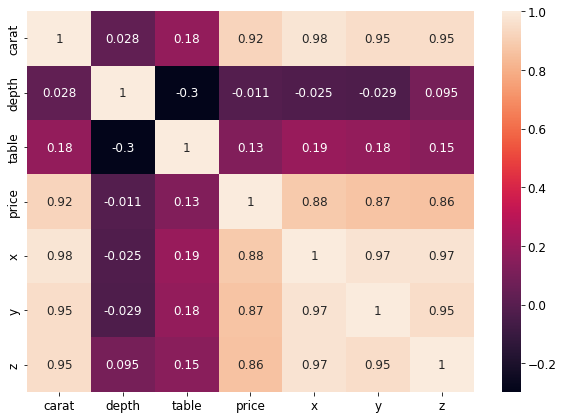

In [26]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), data = df, annot = True)

In [27]:
df.corr()['price'].sort_values(ascending=False)[1:]

carat    0.921548
x        0.884504
y        0.865395
z        0.861208
table    0.126566
depth   -0.011048
Name: price, dtype: float64

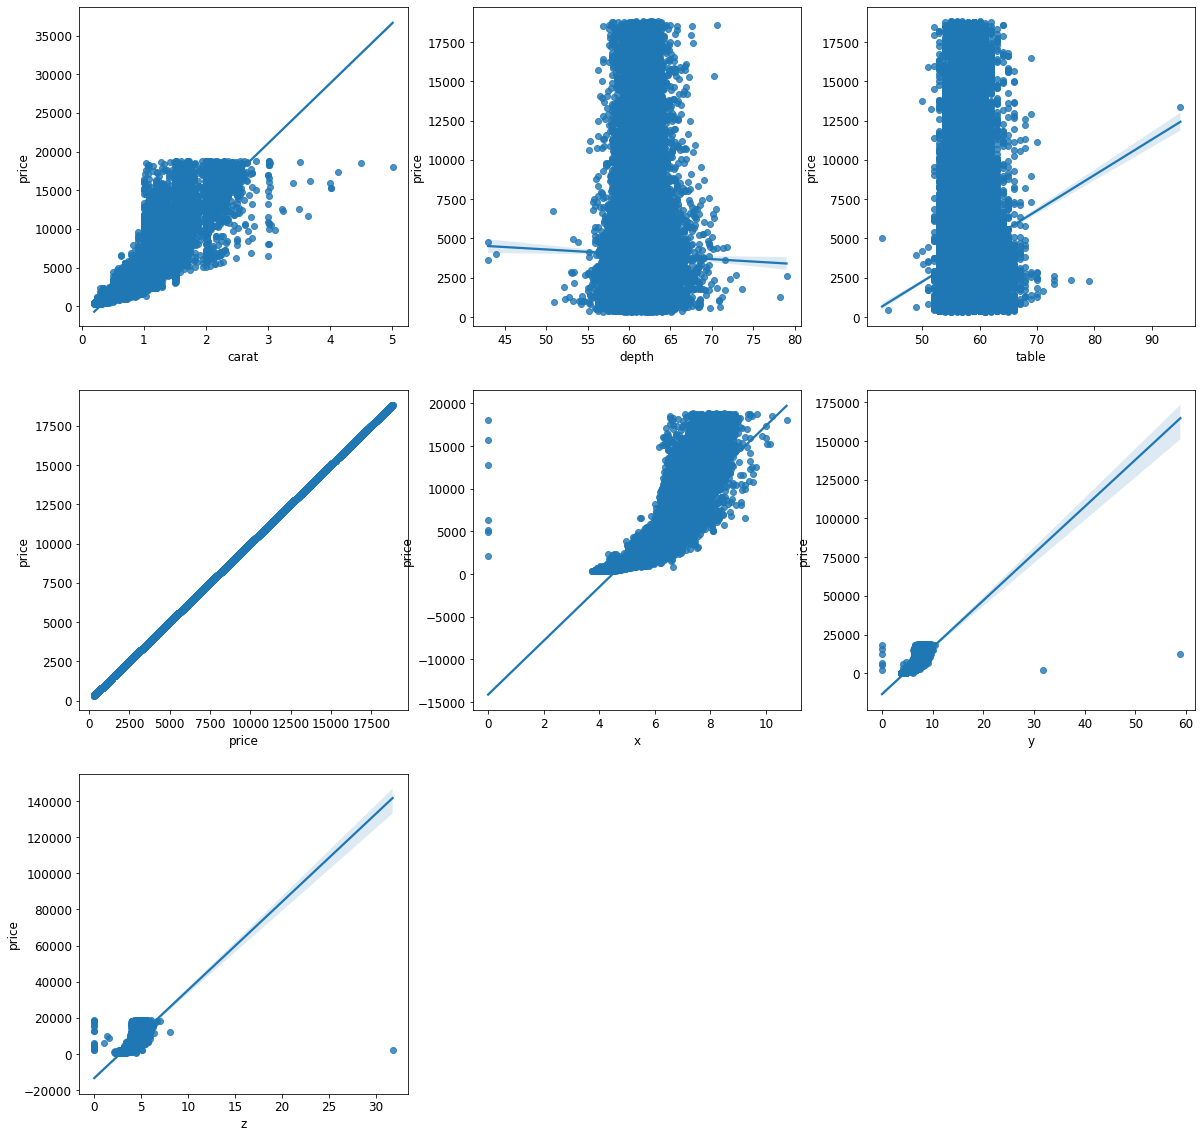

In [28]:
plt.figure(figsize=(20,20))
for i, col in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.regplot(x = col,y="price",data=df[num_col])

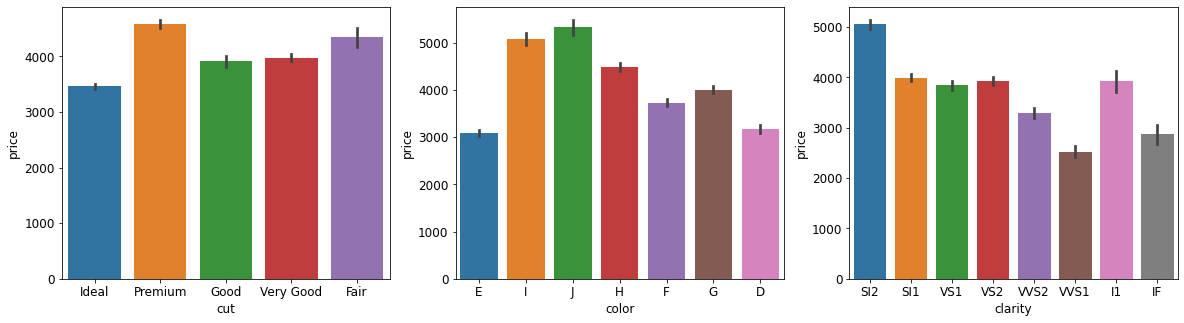

In [29]:
plt.figure(figsize = (20, 5))
plt.rc('font', size=12)
for i , col in enumerate(cat_col):
    plt.subplot(1, 3, i+1)
    sns.barplot(y = df['price'], x = df[col])

# `Model Development`

## `importing libraries`

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## `Extracting independent and dependent variable`

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
X = df.drop('price',axis = 1)
y = df['price']

In [33]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [34]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

## `splitting dataset into training and test set`

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=3)

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((40345, 9), (40345,), (13449, 9), (13449,))

## `prepration of data set`

### `train data set`

### `separting numerical and categorical columns`

In [52]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_cat.head()

,cut,color,clarity
38355,Fair,J,VS2
34862,Ideal,I,VS1
28607,Ideal,F,IF
38188,Very Good,D,SI2
53366,Ideal,F,VS2


In [53]:
X_train_num = X_train.select_dtypes(include=['float','int'])
X_train_num.head()

,carat,depth,table,x,y,z
38355,0.52,65.3,56.0,5.05,5.00,3.28
34862,0.32,62.3,56.0,4.37,4.40,2.73
28607,0.24,62.9,55.0,3.96,3.98,2.50
38188,0.35,62.4,57.0,4.47,4.50,2.80
53366,0.71,62.8,56.0,5.66,5.61,3.54


**`Applying Label Encoding on Categorical Columns`**

In [62]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
38355
34862
28607
38188
53366


In [63]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])
X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])
X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])
X_train_cat_le.head()

,cut,color,clarity
38355,1,1,4
34862,4,2,5
28607,4,5,8
38188,3,7,2
53366,4,5,4


**`Scaling the Numerical Features`**

In [64]:
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
38355,-0.583507,2.474847,-0.654837,-0.603792,-0.634904,-0.361299
34862,-1.005515,0.386807,-0.654837,-1.209820,-1.155708,-1.136458
28607,-1.174318,0.804415,-1.101368,-1.575219,-1.520271,-1.460616
38188,-0.942214,0.456408,-0.208306,-1.120698,-1.068907,-1.037802
53366,-0.182599,0.734814,-0.654837,-0.060149,-0.105419,0.005140


In [65]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_le],axis=1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
38355,-0.583507,2.474847,-0.654837,-0.603792,-0.634904,-0.361299,1,1,4
34862,-1.005515,0.386807,-0.654837,-1.209820,-1.155708,-1.136458,4,2,5
28607,-1.174318,0.804415,-1.101368,-1.575219,-1.520271,-1.460616,4,5,8
38188,-0.942214,0.456408,-0.208306,-1.120698,-1.068907,-1.037802,3,7,2
53366,-0.182599,0.734814,-0.654837,-0.060149,-0.105419,0.005140,4,5,4


### `test data set`

### `separting numerical and categorical columns`

In [66]:
X_test_cat = X_test.select_dtypes(include='object')
X_test_cat.head()

,cut,color,clarity
7847,Fair,G,SI2
41932,Ideal,I,SI1
6417,Fair,G,SI1
50070,Ideal,F,SI1
33812,Premium,E,VS2


In [67]:
X_test_num = X_test.select_dtypes(include=['float','int'])
X_test_num.head()

,carat,depth,table,x,y,z
7847,1.16,60.1,60.0,6.90,6.72,4.09
41932,0.62,61.9,54.0,5.48,5.50,3.40
6417,1.02,64.5,56.0,6.30,6.23,4.04
50070,0.70,61.9,57.0,5.66,5.75,3.53
33812,0.30,62.4,59.0,4.30,4.26,2.67


**`Applying Label Encoding on Categorical Columns`**

In [68]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)
X_test_cat_le.head()

""
7847
41932
6417
50070
33812


In [70]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])
X_test_cat_le.head()

,cut,color,clarity
7847,1,4,2
41932,4,2,3
6417,1,4,3
50070,4,5,3
33812,5,6,4


**`Scaling the Numerical Features`**

In [72]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)
X_test_num_rescaled.head()

,carat,depth,table,x,y,z
7847,0.766918,-1.144422,1.131286,1.044961,0.858069,0.780300
41932,-0.372503,0.108402,-1.547899,-0.220568,-0.200900,-0.192173
6417,0.471513,1.918036,-0.654837,0.510230,0.432745,0.709831
50070,-0.203700,0.108402,-0.208306,-0.060149,0.016102,-0.008953
33812,-1.047716,0.456408,0.684755,-1.272205,-1.277229,-1.221021


In [73]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_le],axis=1)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
7847,0.766918,-1.144422,1.131286,1.044961,0.858069,0.780300,1,4,2
41932,-0.372503,0.108402,-1.547899,-0.220568,-0.200900,-0.192173,4,2,3
6417,0.471513,1.918036,-0.654837,0.510230,0.432745,0.709831,1,4,3
50070,-0.203700,0.108402,-0.208306,-0.060149,0.016102,-0.008953,4,5,3
33812,-1.047716,0.456408,0.684755,-1.272205,-1.277229,-1.221021,5,6,4


## `Using sklearn`

In [75]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [77]:
y_test_pred = regressor.predict(X_test_transformed)
sk_acu=metrics.r2_score(y_test,y_test_pred)
sk_acu

0.9667656597612025

In [79]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
7847,4307,4474.8
41932,1271,1366.6
6417,4044,4040.0
50070,2230,2530.4
33812,844,769.6
